### 목표
- 꽃잎의 길이/너비, 꽃받침의 길이/너비를 통해 iris의 3가지 품종을 분류해보자.
- KNN분류 알고리즘을 이용하고, 하이퍼파라미터를 조정해보자(하이퍼파라미터 튜닝)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #시각화
from matplotlib import rc
rc('font', family='Malgun Gothic')# matplotlib의 한글 셋팅

from sklearn.datasets import load_iris # iris데이터 로딩함수
from sklearn.neighbors impomodel_selection import train_test_split # 훈련세트와 평가세트 나누는 함수
from sklearnrt KNeighborsClassifier #KNN 모델 클래스
from sklearn. import metrics #평가용 모듈

In [2]:
#내장되있는 iris 데이터 로딩해서 확인하기
iris_data = load_iris()

In [3]:
#bunch타입으로 제공해준다. // 파이썬 딕셔너리랑 비슷
type(iris_data)

sklearn.utils.Bunch

In [4]:
#키값 가져오기 data=문제[숫자](특성) target=답(숫자) 
#target_names=답(문자) desct=설명(전체 데이터 설명)
#feature_names=문제(특성)컬럼의 이름 
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### 1. 문제정의
- iris 데이터를 분류해보자(꽃의 특성 4가지 활용)
- 품종은 총 3가지 준비되어있다.

#### 2. 데이터수집
- sklearn의 연습용 iris 데이터 활용

#### 3. 전처리
- 결측치 확인
- 문자데이터 >> 수치데이터
- 스케일링

In [5]:
#문제(숫자)
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
#문제=특성(문자)
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_df=pd.DataFrame(iris_data['data'],
                    columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#결측치 확인, 데이터 타입 확인
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### 4. 데이터 탐색(EDA) - 시각화
- 데이터의 모양(shape)
- 정답 데이터의 종류
- 정답 데이터와 관련있는 특성이 무엇이 있는지
- 기술통계

In [9]:
#데이터 shape 
iris_df.shape

(150, 4)

In [10]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#시리즈 타입으로 바꿈
y = pd.Series(iris_data['target'])

In [12]:
#정답 데이터 비율 확인
y.value_counts()

2    50
1    50
0    50
dtype: int64

In [13]:
#기술통계
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#정답데이터와 관련있는 특성 확인하기
iris_df['label']=y

In [15]:
#label(상관계수) 추가
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
#상관계수 (label)
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


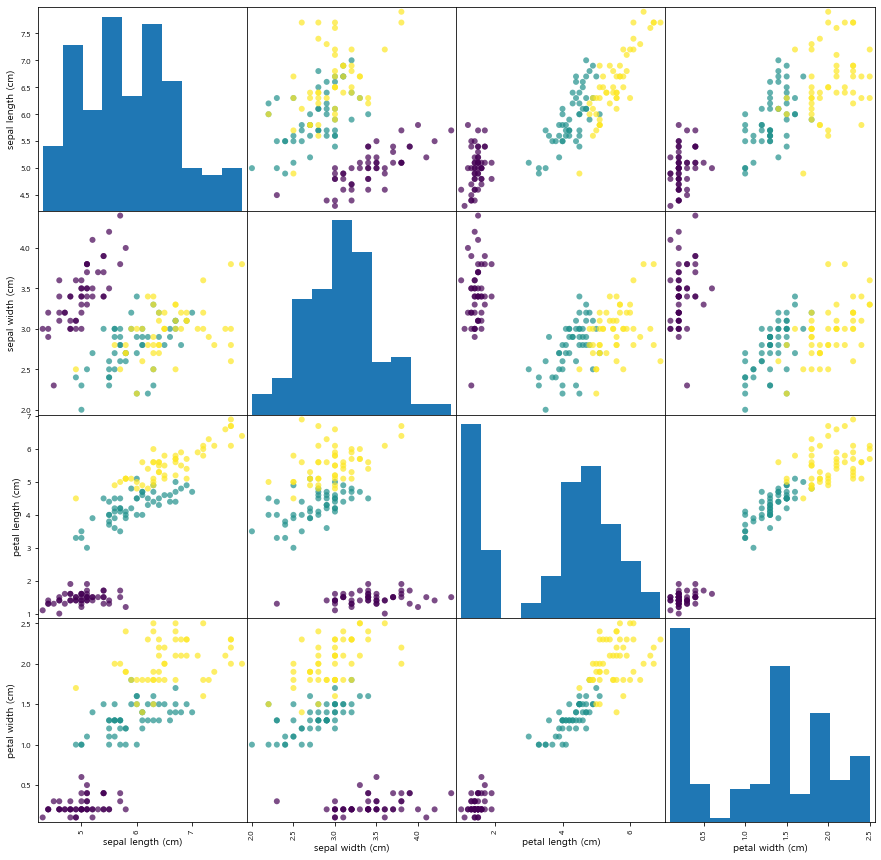

In [17]:
# 시각화 라벨은 필요 없으므로 제거(axis 기본값은 행을 지우기 떄문에 1을 적어줘야 열을 지워줌)
pd.plotting.scatter_matrix(iris_df.drop('label',axis=1),
                           figsize=(15,15), #가로세로 비율
                           marker='o', #o로 그림 채워짐
                           c= y, # 같은 정답끼리 같은색으로 표시
                           alpha  = 0.7)
plt.show()

#보라색 0 초록색 1 노란색 2

#### 5. 모델링(모델선택, 하이퍼파라미터 튜닝)
- KNN 모델 사용
- 이웃의 숫자 > 튜닝

In [18]:
#학습을 위한 문제,답 만들기
#기본값 : train(75%) test(25%)
#자동으로 나눠줌 (train_test_split) 손수 나눌 필요가 없다.
#랜덤 샘플링
#random_state = 아무숫자 >> 난수를 고정해서 랜덤x 항상 똑같은 패턴
#test_size >> 테스트 추출 비율 바꿈 >> 과소적합일거 같을때 train 비율을 늘려
#학습을 더 많이 하게 해보자
#잘 학습된 모델인거 같으면 test비율을 높여서 신뢰도를 높여보자
X_train,X_test,y_train,y_test=train_test_split(iris_data['data'],
                                               iris_data['target'],
                                               random_state=11,
                                               test_size=0.3)

In [19]:
X_train

array([[5.1, 2.5, 3. , 1.1],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 3.2, 1.2, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.6, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3. , 4.2, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3.1, 4.7, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 3.4, 1.6, 0.4],
       [6.1, 2.6, 5.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [6.1, 2.8, 4.7, 1.2],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [6.3, 2.7, 4.9, 1.8],
       [7.1, 3. , 5.9, 2.1],
       [5.5, 2.6, 4.4, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.7, 5.1, 1.9],
       [5.5, 4.2, 1.4, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.1, 3

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [21]:
train_score_list = []
test_score_list = []
for k in range(99,0,-2):#모델이 단순 > 복잡 형태로 바뀜
    #이웃의 숫자에 따른 모델을 생성/학습
    temp_model = KNeighborsClassifier(n_neighbors=k)
    temp_model.fit(X_train,y_train)
    
    #성능확인
    test_score=temp_model.score(X_test,y_test)
    train_score=temp_model.score(X_train,y_train)
    
    #점수 저장
    test_score_list.append(test_score)
    train_score_list.append(train_score)

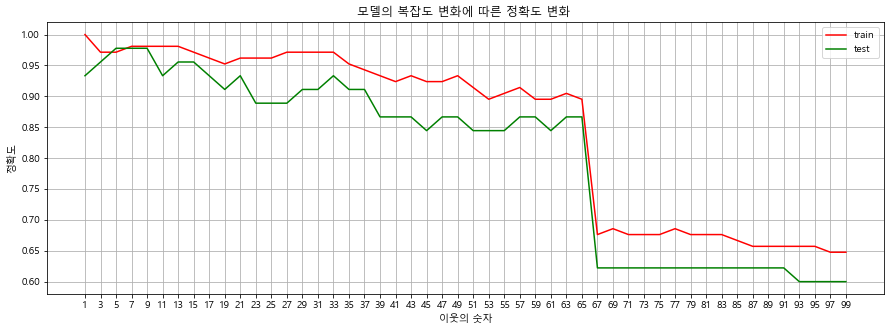

In [22]:
plt.figure(figsize=(15,5))# 그림을 그릴 도화지(figsize=(가로,세로)
plt.plot(range(99,0,-2),train_score_list, c='red',label='train')
plt.plot(range(99,0,-2),test_score_list, c='green',label='test')#선그래프(가로 세로)
plt.xlabel('이웃의 숫자')
plt.ylabel('정확도')
plt.title('모델의 복잡도 변화에 따른 정확도 변화 ')
plt.xticks(range(99,0,-2))#x줄 눈금
plt.grid()#격자
plt.legend()#범례
plt.show()

#150개 데이터를 랜덤하게 7:3으로 나누기때문에 그래프 다를 수 있다.

#### 6. 모델 학습

In [23]:
#최적의 이웃의 수 적어야 된다.
final_knn_model = KNeighborsClassifier(n_neighbors=7)

In [24]:
final_knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

#### 7. 평가

In [25]:
#정확도 점수 : 전체 예측한것중에 맞춘 비율
final_knn_model.score(X_test,y_test)

0.9777777777777777

In [26]:
pre= final_knn_model.predict(X_test)

In [27]:
#(실제값,예측값) >> 재현율과 정밀도에 대해서 결과 도출해줌
#각 품종에 대해 세밀하게 분석
#부족한 부분을 찾아서 새로운 특징을 추가해줘야 되는지 판단
print(metrics.classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [28]:
#선생님의 개인적인 추측
#이름이 비슷
#그냥 넘어가도 될듯
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
#프로젝트 할때 이런 방향으로 하면 된다.

## 교차검증

In [30]:
#교차 검증 임포트
from sklearn.model_selection import cross_val_score

In [32]:
#1. 데이터 2. 모델 3. k개 필요(cv)
#나중에 데이터가 부족하면 x y (train ,test로 나누지 말고) 그대로 써도 나쁘지 않다.
model = KNeighborsClassifier(n_neighbors=5)
result= cross_val_score(model, X_train, y_train, cv=5)
print(result)
#결과값의 평균 .mean()
print(result.mean())

[0.95238095 1.         1.         0.95238095 1.        ]
0.980952380952381


In [33]:
#최적의 파라미터 돌리기 위한 for문
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    result = cross_val_score(model, X_train, y_train, cv=5)
    print("K : {},\t SCORE : {}".format(k, result.mean()))

K : 1,	 SCORE : 0.9714285714285713
K : 2,	 SCORE : 0.980952380952381
K : 3,	 SCORE : 0.9904761904761905
K : 4,	 SCORE : 0.980952380952381
K : 5,	 SCORE : 0.980952380952381
K : 6,	 SCORE : 0.980952380952381
K : 7,	 SCORE : 0.980952380952381
K : 8,	 SCORE : 0.9619047619047618
K : 9,	 SCORE : 0.9714285714285713
K : 10,	 SCORE : 0.9619047619047618
K : 11,	 SCORE : 0.9619047619047618
K : 12,	 SCORE : 0.9523809523809523
K : 13,	 SCORE : 0.9523809523809523
K : 14,	 SCORE : 0.9428571428571427
K : 15,	 SCORE : 0.961904761904762
K : 16,	 SCORE : 0.961904761904762
K : 17,	 SCORE : 0.9714285714285715
K : 18,	 SCORE : 0.9523809523809523
K : 19,	 SCORE : 0.9619047619047618
K : 20,	 SCORE : 0.9619047619047618
K : 21,	 SCORE : 0.9619047619047618
K : 22,	 SCORE : 0.9523809523809523
K : 23,	 SCORE : 0.9619047619047618
K : 24,	 SCORE : 0.9523809523809523
K : 25,	 SCORE : 0.961904761904762
K : 26,	 SCORE : 0.9523809523809523
K : 27,	 SCORE : 0.9523809523809523
K : 28,	 SCORE : 0.9428571428571427
K : 29,	 